In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

**DATA PREPARATION**

In [2]:
#reading the data from the website
hd_data_train=pd.read_csv("http://www.amlbook.com/data/zip/features.train",sep=' ',header=None) 
hd_data_test=pd.read_csv("http://www.amlbook.com/data/zip/features.test",sep=' ',header=None)

In [4]:
#removing all the columns which are having NaN values
hd_data_train.dropna(how='all', axis=1, inplace=True)
hd_data_test.dropna(how='all', axis=1, inplace=True)

In [7]:
#giving names to columns instead of numbers
hd_data_train.columns=['digit','intensity','symmetry']
hd_data_test.columns=['digit','intensity','symmetry']

In [8]:
#re-ordering the columns so that the label(digits) are in the right most column
hd_data_train = hd_data_train[["intensity", "symmetry", "digit"]]
hd_data_test = hd_data_test[["intensity", "symmetry", "digit"]]

In [10]:
hd_data_train

,intensity,symmetry,digit
0,0.341092,-4.528937,6.0
1,0.444131,-5.496812,5.0
2,0.231002,-2.886750,4.0
3,0.200275,-3.534375,7.0
4,0.291936,-4.352062,3.0
...,...,...,...
7286,0.296178,-2.558250,3.0
7287,0.252795,-3.110500,3.0
7288,0.393705,-2.921187,3.0
7289,0.597590,-2.258062,0.0


In [11]:
hd_data_test

,intensity,symmetry,digit
0,0.272178,-4.847937,9.0
1,0.265133,-5.102000,6.0
2,0.335926,-2.921562,3.0
3,0.264850,-4.156625,6.0
4,0.345338,-6.718438,6.0
...,...,...,...
2002,0.237842,-4.052688,3.0
2003,0.265125,-3.630500,9.0
2004,0.308857,-5.365188,4.0
2005,0.509971,-2.010000,0.0


In [13]:
#picking up the training data samples which have labels of only digit 1 and digit 5
df1=hd_data_train.loc[hd_data_train['digit']==1]
df2=hd_data_train.loc[hd_data_train['digit']==5]
trdata=df1.append(df2)
trdata

,intensity,symmetry,digit
7,0.123043,-0.707875,1.0
9,0.113859,-0.931375,1.0
12,0.115371,-0.386000,1.0
13,0.102281,-0.378812,1.0
19,0.142043,-1.819438,1.0
...,...,...,...
7246,0.272961,-5.079125,5.0
7261,0.199475,-4.211938,5.0
7266,0.367961,-5.660000,5.0
7269,0.355293,-4.682750,5.0


In [14]:
#picking up the test data samples which have labels of only digit 1 and digit 5
dftest1=hd_data_test.loc[hd_data_test['digit']==1]
dftest2=hd_data_test.loc[hd_data_test['digit']==5]
tesdata=dftest1.append(dftest2)
tesdata

,intensity,symmetry,digit
16,0.159934,-1.742000,1.0
42,0.124609,-0.474438,1.0
45,0.219117,-0.904500,1.0
52,0.244779,-2.505625,1.0
66,0.105563,-0.218562,1.0
...,...,...,...
1983,0.324154,-5.089062,5.0
1987,0.360320,-5.737500,5.0
1988,0.445924,-5.343562,5.0
1992,0.384980,-5.086000,5.0


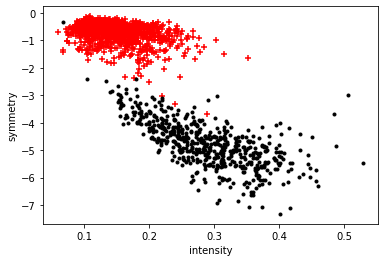

In [15]:
#representation of train data just to get an intuitive understanding
plt.xlabel('intensity')
plt.ylabel('symmetry')
plt.scatter(df1['intensity'], df1['symmetry'],color="red",marker='+')
plt.scatter(df2['intensity'], df2['symmetry'],color="black",marker='.')

Hence, from the above plot, we expect SVM to perform to give more accurate result as there is a clear partition

**Train data and Test data Splitting**

In [16]:
X_train=trdata.drop(['digit'],axis='columns') #considering all columns except the label column(i.e the digit column)
Y_train=trdata.digit #considering the digit column as label

In [17]:
X_test=tesdata.drop(['digit'],axis='columns')
Y_test=tesdata.digit

**Qn 4a. Linear Kernel**

In [18]:
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(X_train,Y_train)

SVC(kernel='linear')

In [19]:
model.score(X_test,Y_test)

0.9787735849056604

In [20]:
model.support_vectors_

array([[ 0.19665234, -1.8435    ],
       [ 0.23962695, -3.3054375 ],
       [ 0.24764258, -2.31925   ],
       [ 0.22255859, -2.02525   ],
       [ 0.16217188, -2.327625  ],
       [ 0.17714062, -2.3680625 ],
       [ 0.22025   , -3.0306875 ],
       [ 0.19193359, -1.929375  ],
       [ 0.18467578, -2.040125  ],
       [ 0.18350195, -2.1923125 ],
       [ 0.18408398, -1.84125   ],
       [ 0.28905469, -3.669375  ],
       [ 0.20046875, -2.5005    ],
       [ 0.18711914, -2.3135    ],
       [ 0.16456055, -2.7685625 ],
       [ 0.14020508, -2.8765    ],
       [ 0.15241797, -2.6614375 ],
       [ 0.15593555, -3.0060625 ],
       [ 0.15175   , -2.97025   ],
       [ 0.10407031, -2.424125  ],
       [ 0.14236523, -2.8335    ],
       [ 0.16499609, -2.9005    ],
       [ 0.17932031, -2.390125  ],
       [ 0.18000586, -2.755125  ],
       [ 0.13432812, -2.488     ],
       [ 0.30482617, -3.0379375 ],
       [ 0.50546875, -2.978125  ],
       [ 0.06804883, -0.315     ]])

In the above array,the number of rows represent the total number of support vectors and number of columns represent the number of attributes. Hence we need to find the number of rows in order to get the number of support vectors

In [21]:
sv_linear=model.support_vectors_
print("No of support vectors: ",sv_linear.shape[0])

No of support vectors:  28


**Qn.4b-Train only using the first (50,100,200,800) points with the linear kernel.**

First let us shuffle our training data set

In [22]:
trdata=trdata.sample(frac=1)
trdata

,intensity,symmetry,digit
5273,0.117906,-0.303625,1.0
3371,0.323719,-4.452500,5.0
2718,0.165342,-1.166875,1.0
6984,0.124479,-0.469500,1.0
1424,0.178096,-3.231313,5.0
...,...,...,...
6381,0.264451,-6.168188,5.0
3720,0.211395,-0.498375,1.0
1717,0.222559,-2.025250,1.0
4373,0.290623,-5.064063,5.0


Picking the first 50 samples

In [23]:
tr50=trdata.iloc[:50]
X_train50=tr50.drop(['digit'],axis='columns')
Y_train50=tr50.digit

model50=SVC(kernel='linear')
model50.fit(X_train50,Y_train50)
model50.score(X_test,Y_test)

0.9764150943396226

In [24]:
sv_linear50=model50.support_vectors_
print("No of support vectors with 50 data points: ",sv_linear50.shape[0])

No of support vectors with 50 data points:  2


Picking the first 100 samples

In [25]:
tr100=trdata.iloc[:100]
X_train100=tr100.drop(['digit'],axis='columns')
Y_train100=tr100.digit

model100=SVC(kernel='linear')
model100.fit(X_train100,Y_train100)
model100.score(X_test,Y_test)

0.9787735849056604

In [33]:
sv_linear100=model100.support_vectors_
print("No of support vectors with 100 data points: ",sv_linear100.shape[0])

No of support vectors with 100 data points:  4


Picking the first 200 samples

In [27]:
tr200=trdata.iloc[:200]
X_train200=tr200.drop(['digit'],axis='columns')
Y_train200=tr200.digit

model200=SVC(kernel='linear')
model200.fit(X_train200,Y_train200)
model200.score(X_test,Y_test)

0.9740566037735849

In [32]:
sv_linear200=model200.support_vectors_
print("No of support vectors with 200 data points: ",sv_linear200.shape[0])

No of support vectors with 200 data points:  6


Picking the first 800 samples

In [29]:
tr800=trdata.iloc[:800]
X_train800=tr800.drop(['digit'],axis='columns')
Y_train800=tr800.digit

model800=SVC(kernel='linear')
model800.fit(X_train800,Y_train800)
model800.score(X_test,Y_test)

0.9787735849056604

In [31]:
sv_linear800=model800.support_vectors_
print("No of support vectors with 800 data points: ",sv_linear800.shape[0])

No of support vectors with 800 data points:  16


**Qn 4c**

Here we have to find multiple models with Q(degree of the polynomial)=2 and Q=5 for different values of C

In [34]:
X_train=trdata.drop(['digit'],axis='columns')
Y_train=trdata.digit
X_test=tesdata.drop(['digit'],axis='columns')
Y_test=tesdata.digit

svm1_q2=SVC(C=0.0001, kernel='poly',degree=2,gamma=1, coef0=1)
svm2_q2=SVC(C=0.001, kernel='poly',degree=2,gamma=1, coef0=1)
svm3_q2=SVC(C=0.01,kernel='poly',degree=2,gamma=1, coef0=1)
svm4_q2=SVC(C=1,kernel='poly',degree=2,gamma=1, coef0=1)

svm1_q5=SVC(C=0.0001, kernel='poly',degree=5,gamma=1, coef0=1)
svm2_q5=SVC(C=0.001, kernel='poly',degree=5,gamma=1, coef0=1)
svm3_q5=SVC(C=0.01,kernel='poly',degree=5,gamma=1, coef0=1)
svm4_q5=SVC(C=1,kernel='poly',degree=5,gamma=1, coef0=1)

#fitting the model for Q=2
svm1_q2.fit(X_train,Y_train)
svm2_q2.fit(X_train,Y_train)
svm3_q2.fit(X_train,Y_train)
svm4_q2.fit(X_train,Y_train)

#fitting the model for Q=5
svm1_q5.fit(X_train,Y_train)
svm2_q5.fit(X_train,Y_train)
svm3_q5.fit(X_train,Y_train)
svm4_q5.fit(X_train,Y_train)

SVC(C=1, coef0=1, degree=5, gamma=1, kernel='poly')

4C(i): Comparison of training error when C=0.0001

In [36]:
print('Training error for Q=2 when C=0.0001: ', (1-svm1_q2.score(X_train,Y_train)))
print('Training error for Q=5 when C=0.0001: ', (1-svm1_q5.score(X_train,Y_train)))
print((1-svm1_q5.score(X_train,Y_train))>(1-svm1_q2.score(X_train,Y_train))) ##Is training error higher when Q=5?

Training error for Q=2 when C=0.0001:  0.008968609865470878
Training error for Q=5 when C=0.0001:  0.004484304932735439
False


4C(ii):Comparison of No of support vectors when C=0.001 

In [39]:
n_svq2=svm2_q2.support_vectors_
n_svq5=svm2_q5.support_vectors_
print('No of support vectors when Q=2 and Q=5 are',n_svq2.shape[0],'and',n_svq5.shape[0],'respectively')

No of support vectors when Q=2 and Q=5 are 76 and 25 respectively


4C(iii): Comparison of training error when C=0.01

In [40]:
print('Training error for Q=2 when C=0.01: ', (1-svm3_q2.score(X_train,Y_train)))
print('Training error for Q=5 when C=0.01: ', (1-svm3_q5.score(X_train,Y_train)))
print((1-svm3_q5.score(X_train,Y_train))>(1-svm3_q2.score(X_train,Y_train))) ##Is training error higher when Q=5?

Training error for Q=2 when C=0.01:  0.004484304932735439
Training error for Q=5 when C=0.01:  0.0038436899423446302
False


4C(iv): Comparison of test error when C=1

In [41]:
print('Test error for Q=2 when C=1: ', (1-svm4_q2.score(X_test,Y_test)))
print('Test error for Q=5 when C=1: ', (1-svm4_q5.score(X_test,Y_test)))
print((1-svm4_q5.score(X_test,Y_test))<(1-svm4_q2.score(X_test,Y_test))) ##Is test error lower when Q=5? 

Test error for Q=2 when C=1:  0.018867924528301883
Test error for Q=5 when C=1:  0.021226415094339646
False


**Qn 4d: RBF kernel with different values of C and gamma=1**

In [42]:
svm1_rbf=SVC(C=0.01, kernel='rbf',gamma=1)
svm2_rbf=SVC(C=1, kernel='rbf',gamma=1)
svm3_rbf=SVC(C=100,kernel='rbf',gamma=1)
svm4_rbf=SVC(C=10000,kernel='rbf',gamma=1) #C=10^4
svm5_rbf=SVC(C=1000000,kernel='rbf',gamma=1) #C=10^6

#Model building
svm1_rbf.fit(X_train,Y_train)
svm2_rbf.fit(X_train,Y_train)
svm3_rbf.fit(X_train,Y_train)
svm4_rbf.fit(X_train,Y_train)
svm5_rbf.fit(X_train,Y_train)

#training errors
p=svm1_rbf.score(X_train,Y_train)
q=svm2_rbf.score(X_train,Y_train)
r=svm3_rbf.score(X_train,Y_train)
s=svm4_rbf.score(X_train,Y_train)
t=svm5_rbf.score(X_train,Y_train)

train_acc=[p,q,r,s,t]

#testing errors
u=svm1_rbf.score(X_test,Y_test)
v=svm2_rbf.score(X_test,Y_test)
x=svm3_rbf.score(X_test,Y_test)
y=svm4_rbf.score(X_test,Y_test)
z=svm5_rbf.score(X_test,Y_test)

test_acc=[u,v,x,y,z]

In [44]:
train_err=[1-p,1-q,1-r,1-s,1-t]
train_err #training error for all values of C

[0.0038436899423446302,
 0.004484304932735439,
 0.0032030749519538215,
 0.002562459961563124,
 0.0006406149903908087]

In [45]:
test_err=[1-u,1-v,1-x,1-y,1-z]
test_err #test error for all values of C

[0.02358490566037741,
 0.021226415094339646,
 0.018867924528301883,
 0.02358490566037741,
 0.02358490566037741]

In [50]:
min_tr=min(train_err)
min_tr

0.0006406149903908087

In [51]:
min_test=min(test_err)
min_test

0.018867924528301883

In [52]:
print('Lowest value of training error is',min_tr,'which is when C=10^6')
print('Lowest value of test error is',min_test,'which is when C=100')

Lowest value of training error is 0.0006406149903908087 which is when C=10^6
Lowest value of test error is 0.018867924528301883 which is when C=100
